# 📊 SQL Project : HR Employee Retention Analysis using SQLite + Python

##  Objective
The goal of this project is to analyze employee attrition patterns using structured HR data and gain business insights that could help reduce workforce turnover.

We used:
- SQL (via SQLite) for querying and calculations
- Python (pandas, matplotlib, seaborn, plotly) for visualization

This project covers:
- Attrition Rate KPIs
- Department & Job Role Insights
- Tenure-based analysis
- Salary-based employee ranking


## Load Data and Create SQLite Table

We first load the IBM HR Employee Attrition dataset and insert it into an SQLite database named `hr_attrition.db`. The table is called `employee_attrition`.

We then explore the dataset and confirm successful table creation.

In [2]:
#  Import packages
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Connect to SQLite DB
conn = sqlite3.connect('hr_attrition.db')

df.to_sql('employee_attrition', conn, if_exists='replace', index=False)

# check: Show table
tables = conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
print("Tables in DB:", tables)


df1 = pd.read_sql_query("SELECT * FROM employee_attrition LIMIT 5;", conn)
df1.head()

Tables in DB: [('employee_attrition',)]


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


##  Overall Attrition Rate

We calculate the percentage of employees who left the company (`Attrition = 'Yes'`) across the entire dataset.

This acts as a baseline KPI for workforce stability.

In [3]:
query1 = """
SELECT 
  ROUND(
    (CAST(SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS FLOAT) * 100.0)
    / COUNT(*), 2
  ) AS attrition_rate_percent
FROM employee_attrition;
"""
attrition_rate = pd.read_sql_query(query1, conn)
attrition_rate

,attrition_rate_percent
0,16.12


## Department-Wise Attrition Analysis

We calculate:
- Total employees in each department
- Count of employees who left
- Attrition rate percentage

This helps us identify which departments experience the most turnover.

In [4]:
query2 = """
SELECT 
  Department,
  COUNT(*) AS total_employees,
  SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS attrition_count,
  ROUND(
    (CAST(SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS FLOAT) * 100.0) / COUNT(*), 
    2
  ) AS attrition_rate_percent
FROM employee_attrition
GROUP BY Department
ORDER BY attrition_rate_percent DESC;
"""
dept_attrition = pd.read_sql_query(query2, conn)
dept_attrition

,Department,total_employees,attrition_count,attrition_rate_percent
0,Sales,446,92,20.63
1,Human Resources,63,12,19.05
2,Research & Development,961,133,13.84


## Job Role-Wise Attrition Analysis

This query explores attrition patterns across different job functions.

We then visualize this using a horizontal bar chart with Seaborn.

In [5]:
query3 = """
SELECT 
  JobRole,
  COUNT(*) AS total_employees,
  SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS attrition_count,
  ROUND(
    (CAST(SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS FLOAT) * 100.0) / COUNT(*), 
    2
  ) AS attrition_rate_percent
FROM employee_attrition
GROUP BY JobRole
ORDER BY attrition_rate_percent DESC;
"""
job_attrition = pd.read_sql_query(query3, conn)
job_attrition

,JobRole,total_employees,attrition_count,attrition_rate_percent
0,Sales Representative,83,33,39.76
1,Laboratory Technician,259,62,23.94
2,Human Resources,52,12,23.08
3,Sales Executive,326,57,17.48
4,Research Scientist,292,47,16.10
5,Manufacturing Director,145,10,6.90
6,Healthcare Representative,131,9,6.87
7,Manager,102,5,4.90
8,Research Director,80,2,2.50


C:\Users\soura\AppData\Local\Temp\ipykernel_6960\2528720924.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='attrition_rate_percent', y='JobRole', data=job_attrition, palette='Reds_r')


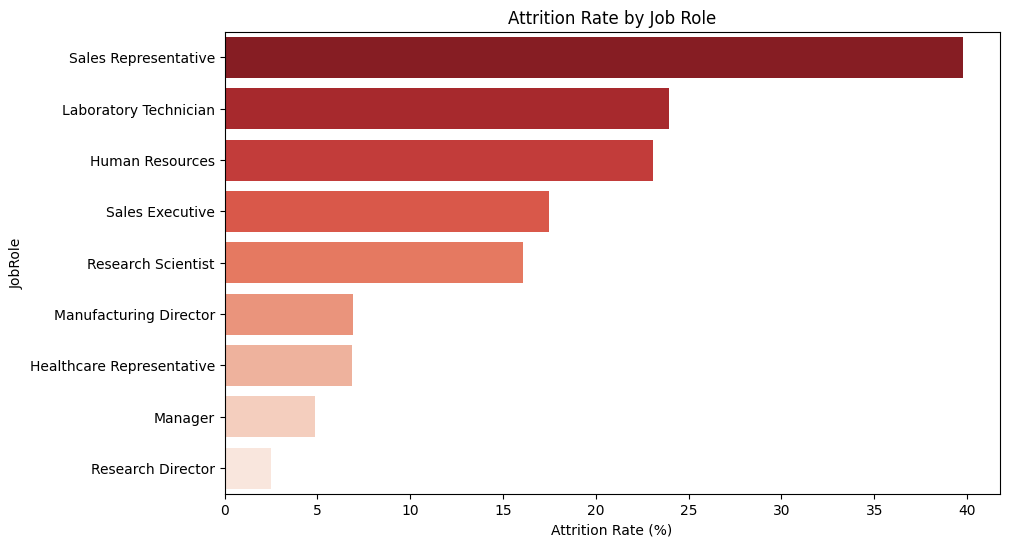

In [6]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='attrition_rate_percent', y='JobRole', data=job_attrition, palette='Reds_r')
plt.title('Attrition Rate by Job Role')
plt.xlabel('Attrition Rate (%)')
plt.savefig('Attrition Rate by Job Role.png', dpi=300, bbox_inches='tight')
plt.show()

##  Attrition by Employee Tenure

We categorize employees into tenure buckets:
- 0–2 years
- 3–5 years
- 6–10 years
- 10+ years

Then calculate attrition rates by these buckets using a CTE (Common Table Expression).

This analysis shows whether short-tenure employees are more likely to leave.

In [7]:
query4 = """
WITH TenureBuckets AS (
  SELECT 
    *,
    CASE 
      WHEN YearsAtCompany < 3 THEN '0-2 Years'
      WHEN YearsAtCompany BETWEEN 3 AND 5 THEN '3-5 Years'
      WHEN YearsAtCompany BETWEEN 6 AND 10 THEN '6-10 Years'
      ELSE '10+ Years'
    END AS tenure_bucket
  FROM employee_attrition
)
SELECT 
  tenure_bucket,
  COUNT(*) AS total_employees,
  SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS attrition_count,
  ROUND(
    (CAST(SUM(CASE WHEN Attrition = 'Yes' THEN 1 ELSE 0 END) AS FLOAT) * 100.0) / COUNT(*), 
    2
  ) AS attrition_rate_percent
FROM TenureBuckets
GROUP BY tenure_bucket
ORDER BY tenure_bucket;
"""
tenure_attrition = pd.read_sql_query(query4, conn)
tenure_attrition

,tenure_bucket,total_employees,attrition_count,attrition_rate_percent
0,0-2 Years,342,102,29.82
1,10+ Years,246,20,8.13
2,3-5 Years,434,60,13.82
3,6-10 Years,448,55,12.28


## Top Earners by Department

Using the SQL `RANK()` window function, we rank employees by their `MonthlyIncome` within each department.

We extract the top 10 earners to identify compensation trends by department.

In [8]:
query5 = """
SELECT 
  EmployeeNumber,
  Department,
  MonthlyIncome,
  RANK() OVER (
    PARTITION BY Department
    ORDER BY MonthlyIncome DESC
  ) AS income_rank
FROM employee_attrition
ORDER BY Department, income_rank
LIMIT 10;
"""
salary_ranking = pd.read_sql_query(query5, conn)
salary_ranking

,EmployeeNumber,Department,MonthlyIncome,income_rank
0,1338,Human Resources,19717,1
1,1625,Human Resources,19658,2
2,1973,Human Resources,19636,3
3,734,Human Resources,19189,4
4,731,Human Resources,19141,5
5,140,Human Resources,18844,6
6,644,Human Resources,18200,7
7,148,Human Resources,17328,8
8,1408,Human Resources,16799,9
9,1550,Human Resources,16437,10


## Interactive Dashboards with Plotly

We use Plotly to generate:

- 🔷 Bar chart: Attrition Rate by Department
- 🟣 Bar chart: Attrition Rate by Tenure Bucket
- 📋 Table: Top Salary Rankings by Department

These interactive charts enhance readability and make our findings presentation-ready.

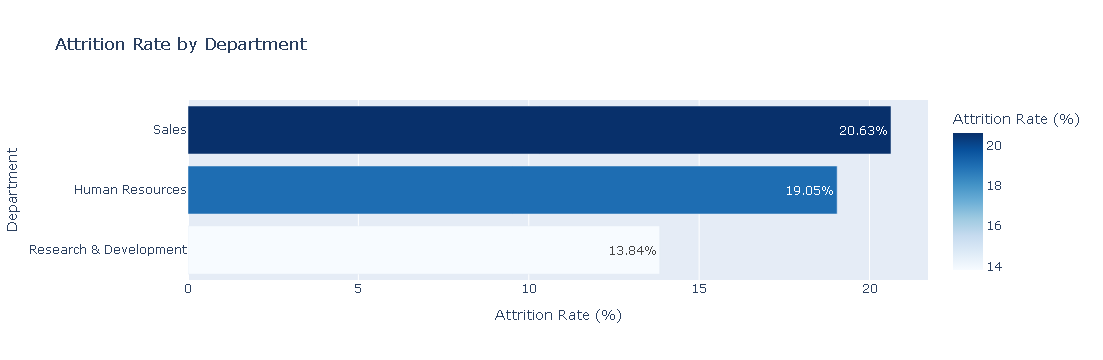

In [9]:
fig = px.bar(
    dept_attrition,
    x='attrition_rate_percent',
    y='Department',
    orientation='h',
    color='attrition_rate_percent',
    color_continuous_scale='Blues',
    title='Attrition Rate by Department',
    labels={'attrition_rate_percent': 'Attrition Rate (%)'},
    text='attrition_rate_percent'
)
fig.update_traces(texttemplate='%{text}%', textposition='inside')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()
fig.write_image('attrition_by_department_plotly.png', scale=2)

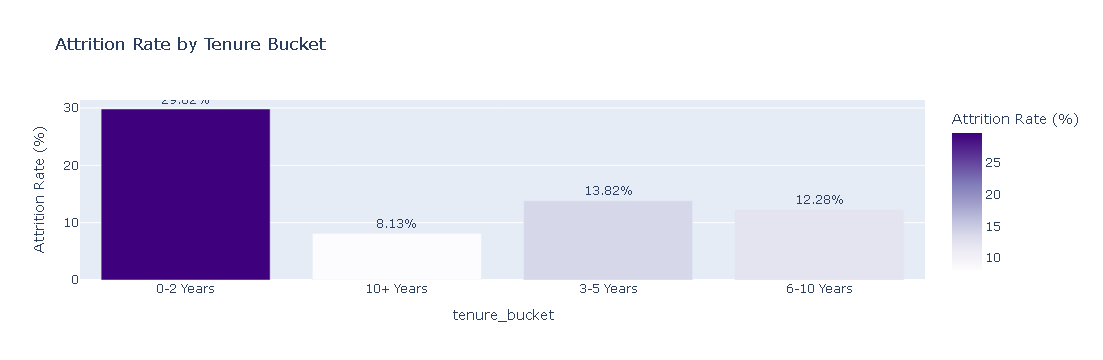

In [11]:
fig = px.bar(
    tenure_attrition,
    x='tenure_bucket',
    y='attrition_rate_percent',
    color='attrition_rate_percent',
    color_continuous_scale='Purples',
    title='Attrition Rate by Tenure Bucket',
    labels={'attrition_rate_percent': 'Attrition Rate (%)'},
    text='attrition_rate_percent'
)
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.show()
fig.write_image('Attrition Rate by Tenure Bucket Plotly.png', scale=2)

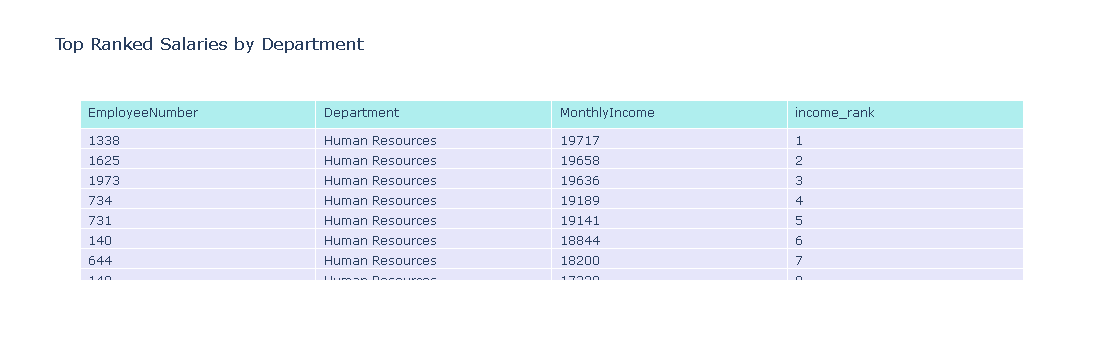

In [13]:
fig = go.Figure(
    data=[go.Table(
        header=dict(values=list(salary_ranking.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[salary_ranking[col] for col in salary_ranking.columns],
                   fill_color='lavender',
                   align='left'))
    ]
)
fig.update_layout(title='Top Ranked Salaries by Department')
fig.show()
fig.write_image('Top Ranked Salaries by Department Plotly.png', scale=2)

In [14]:
conn.close()

##  Summary & Insights

Key takeaways:
- Certain departments and job roles show significantly higher attrition rates
- Newer employees (0–2 years) are at greater risk of leaving
- Top salaries are not evenly distributed across departments

This project demonstrates real-world HR analytics use cases using SQL and Python:
- CTEs, aggregate functions, and window functions in SQL
- Clean, clear charts in both Seaborn and Plotly
- Business-friendly storytelling with structured data

